# Theory Part

# Naive Bayes Part 1

# Theory and predict titanic survival using naive Bayes

# Topics:
1. Basics of probability
2. Coniditional probability
3. Bayes theorem
4. Coding
5. GaussianNB classifier

# 1: Basics of probability

We all know that when we flip a coin the probabilty of getting head or tail is 1/2

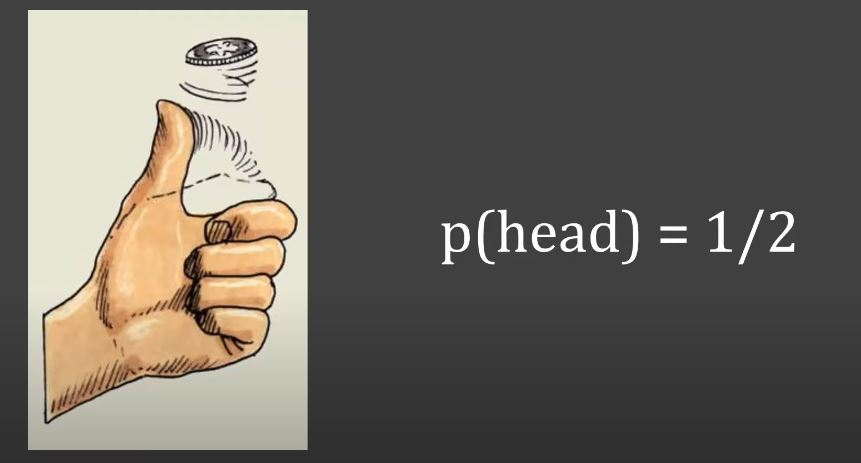

It is beacuse there are 2 possible outcomes and the chance of getting head or tail is 50%. Similarly when we pick a random card the probability of that being a Quenn is 4/52. It is very simple, there are total 4 queens and total 52 cards hence the probability of getting Queen is 4/52 which is 1/13.

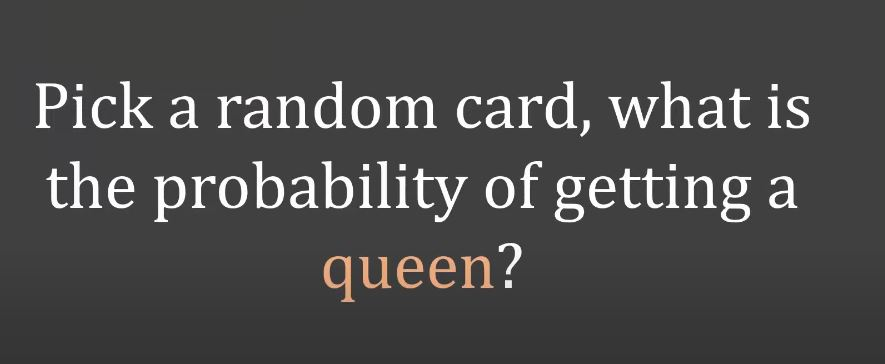

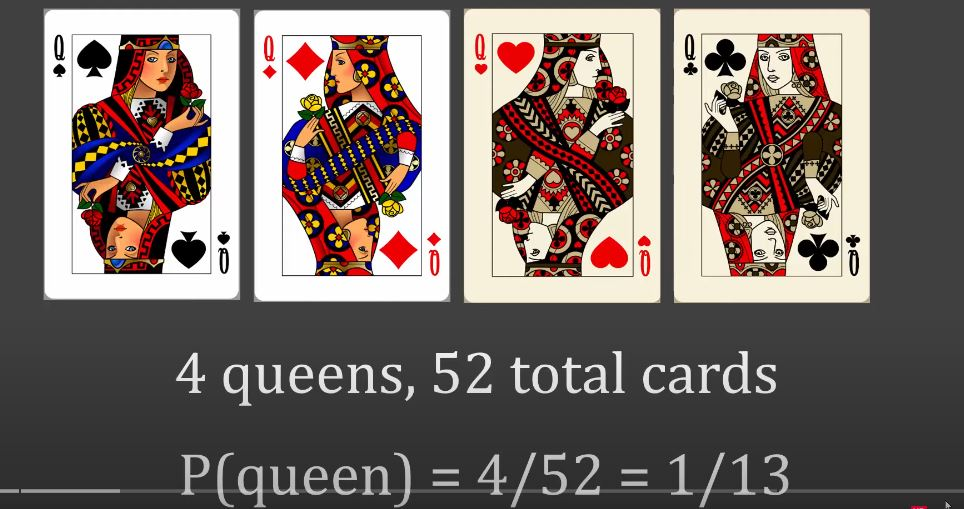

If you know that the card you have picked is a diamond then whats the probability of getting a queen, so well it is called a conditional probability where you know that even A is occurred and then now you are trying to predict the probability of B.

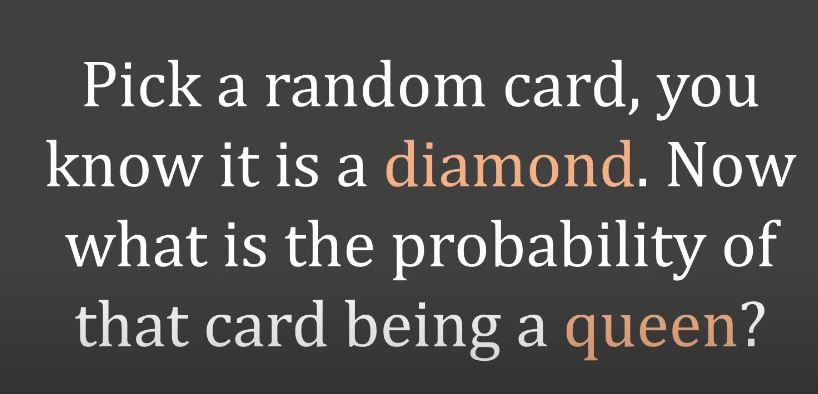

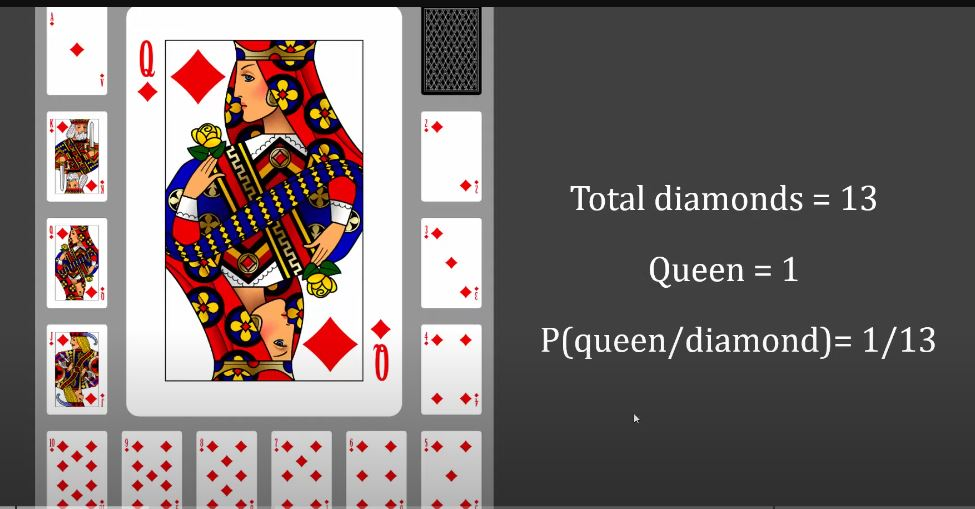

So total diamonds are 13 and Queen is 1, we all know by simple intuition that prob here 13 but this is how conditional probab is represented where you say P of Queens less diamond where we know that event diamond is already occurred and the probab of getting a Queen is something you are calculating. So thats called a conditional probability and the way it is represented is shown:

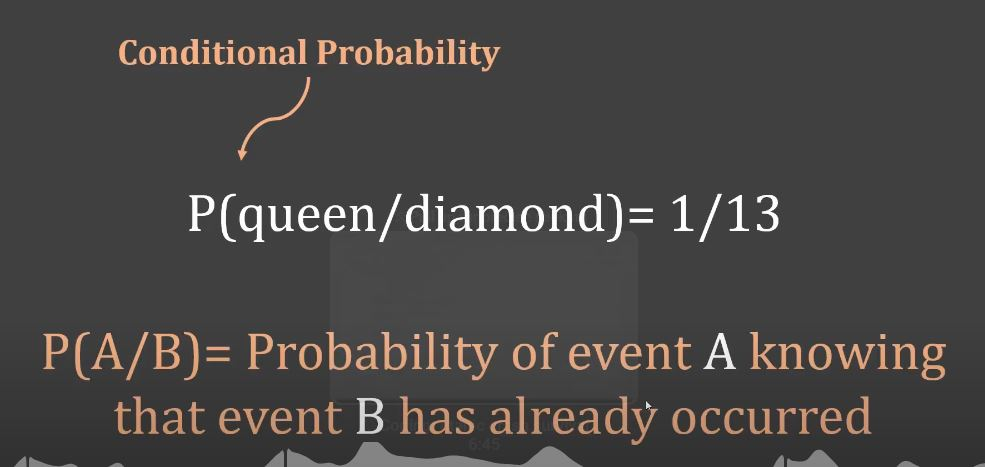

Where event B has already occurred which is we know that the card is diamond and we are trying to find the probab of event A which is weather the card is Queen or not.

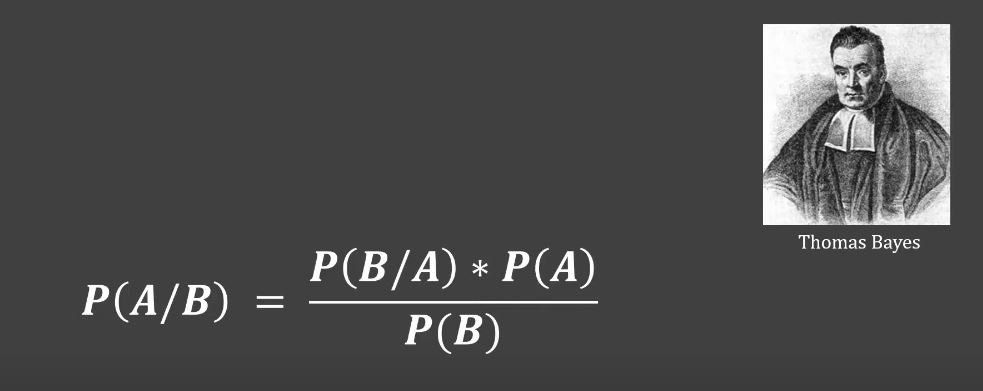

Thomas Bayes gives this famous equation of finding a conditional probab where you can find the probabl. of A given the event B has occurred by knowing some parameters which is the individual probabl. of A and B and knowing the probabl. of B given that A has occurred.

So lets look it in a context of Queen and diamond problem:

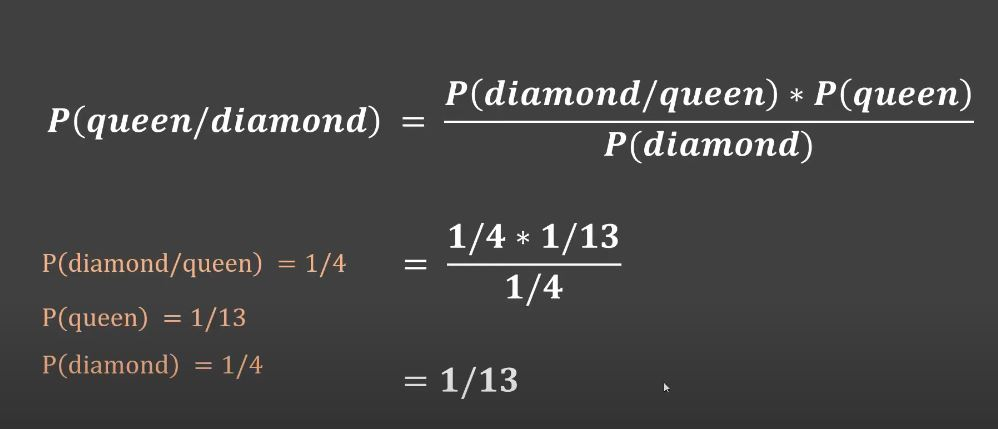

So here we know that the individual probabl. and if we put them into our equation we can easily find this conditional probabl.This is a very powerful theorem where we know the probabl. of certain events but dont know the probabl. of some other events and using those certain events we can find other probabl..

We all know about titanic crash:

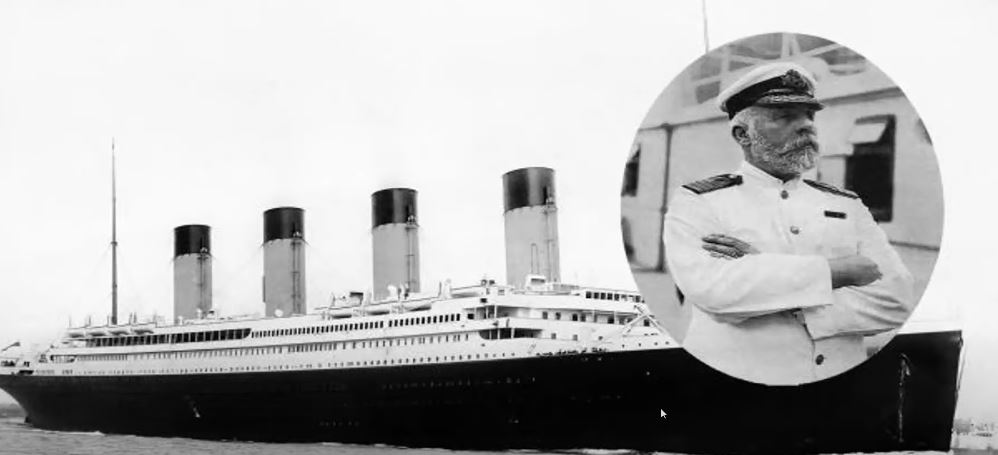

There was a movie that was made on titanic and it was super hit but that event actually occurred and it was said that so many people died, we have a dataset of this Titanic crash where there are name of peoples along with certain features which is your fare, ticket etc

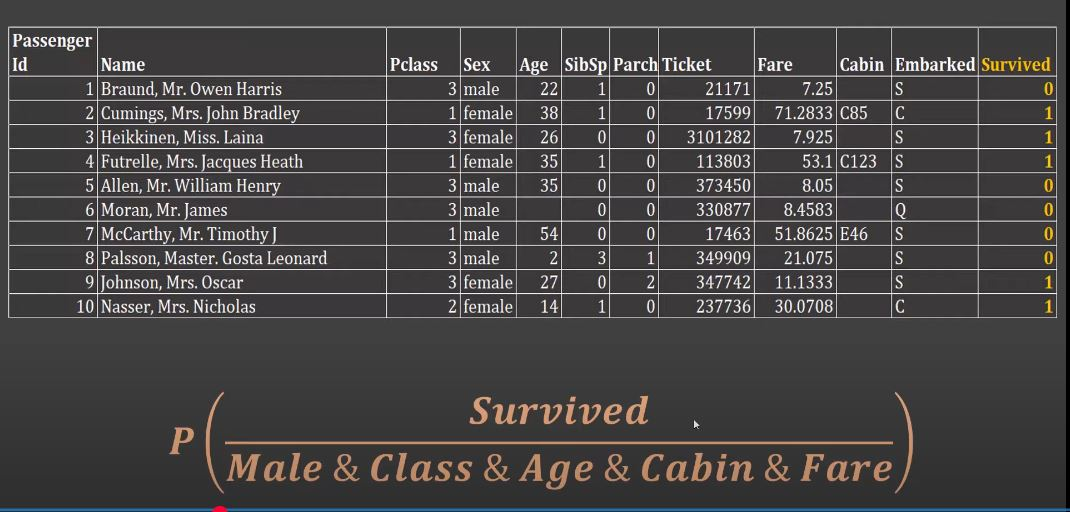

Based on that we are trying to find the survival rate and here we can use the Bayes theorem as shown.

The reason it is called Naive Bayes is because we make a Naive assumption that

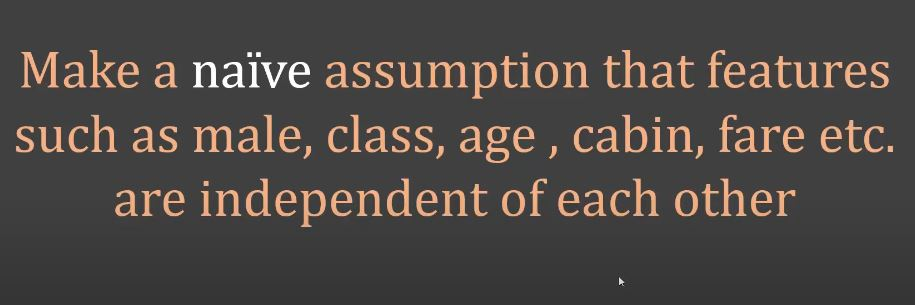

In reality some of these features might be dependent such as the fair & cabin are kind of related but we assume for simplicity purpose that these are not related hence it is called naive bayes and it is a simple assumption which reduces our calculation and makes the algorithm simple and affective, if we want to dive into maths then watch video on Naive Bayes by **Luis Serrano**.

Naive Bayes is used in Email spam detection, Hand digit character recognition, the weather prediction, face detection and news articles categorization:

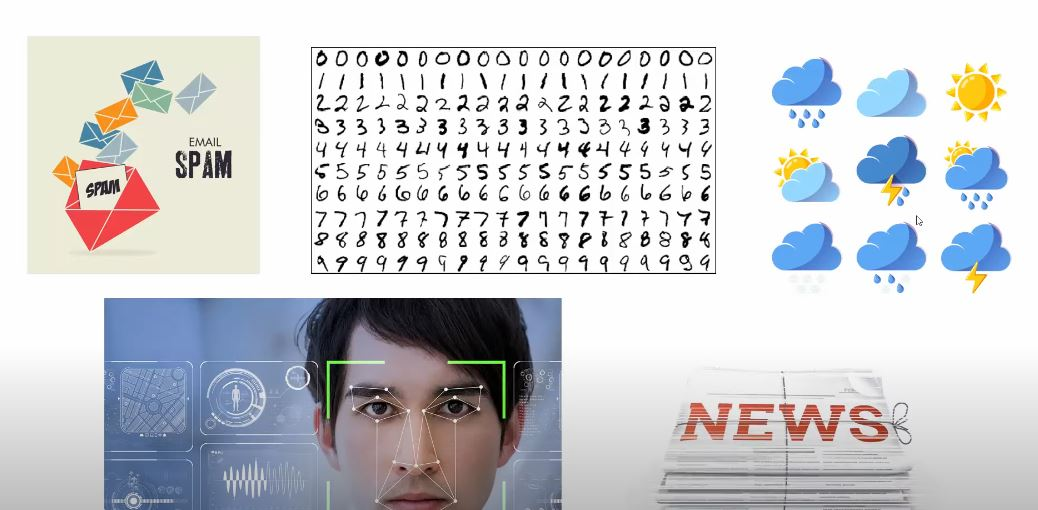


# Coding Part

In [5]:
import pandas as pd
df = pd.read_csv('14_titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
# data exploration and cleaning

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns', inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [15]:
target = df.Survived
inputs = df.drop('Survived',axis='columns')

In [16]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [17]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


In [18]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [22]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [23]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [25]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
5,3,29.699118,8.4583,False,True


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [27]:
len(X_test)

179

In [28]:
len(X_train)

712

In [29]:
len(inputs)

891

In [30]:
# Naive base model

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [32]:
model.fit(X_train,y_train)

GaussianNB()

In [33]:
model.score(X_test,y_test)

0.7988826815642458

In [34]:
X_test[:10]

,Pclass,Age,Fare,female,male
826,3,29.699118,56.4958,False,True
760,3,29.699118,14.5000,False,True
754,2,48.000000,65.0000,True,False
726,2,30.000000,21.0000,True,False
71,3,16.000000,46.9000,True,False
0,3,22.000000,7.2500,False,True
672,2,70.000000,10.5000,False,True
339,1,45.000000,35.5000,False,True
529,2,23.000000,11.5000,False,True
124,1,54.000000,77.2875,False,True


In [35]:
y_test[:10]

826    0
760    0
754    1
726    1
71     0
0      0
672    0
339    0
529    0
124    0
Name: Survived, dtype: int64

In [36]:
model.predict(X_test[:10])

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0])